In [1]:
# Unsupervised Learning
# Given that the majority of available data is unlabeled (we have input features X but no labels y), unsupervised learning
# has huge potential in many application areas. For example anomaly detection, where labelling of data is long, costly,
# tedious, and normally only done on a small subset of the dataset - so supervised algorithms will have poor performance.
# Also, say in a production line, if the product is changed, the whole process will need to be restarted from scratch.

# Dimensionality reduction is the most common unsupervised task, but other common areas are:
# Clustering: group similar instances into clusters - useful for data analysis, recommender systems, search engines,
# image segmentation, semi-supervised learning, dimensionality reduction, etc.
# Anomaly detetion: objective is to learn what normal data looks like, then detect abnormal instances like defective
# items on a production line or a new trend in a time series
# Density estimation: estimating the probability density function (PDF) of the random process that generated the dataset
# - commonly used for anomaly detection as instnaes located in low-density regions are likely to be anomalies. Also used
# in data analysis and visualization

In [2]:
# Clustering is the task of identifying similar instances and assigning them to clusters (groups of similar instances).
# Like classification, each instance is assigned to a group, however clustering achieves this without the label
# (unsupervised). The main applications include:

# Customer segmentation: clustering based on purchases and activity on a website
# Data analysis: run clustering algorithm so you can analyse each cluster separately
# Dimensionality reduction: once a dataset is clustered, the affinity of each instance can be measured (a measure of how
# well an instance fits into a cluster). So each instance's feature vector x can be replaced by a k-dimensional affinity
# vector, for k clusters. Generally k < n and it can preserve enough information for further processing
# Anomaly detection: any instance with a low affinity to all clusters is likely an anomaly
# Semi-supervised learning: if you only have a few labels, perform clustering and assign labels to all the instances in
# the same cluster - greatly increases number of labels for subsequent supervised algorithm, improving performance
# Image segmentation: by clustering pixels according to color, then replacing each pixel's color with the mean color of the
# cluster, you reduce the number of different colors in the image - used in object detection as it is easier to detect the
# contours of each object

# There is no universal definition of what a cluster is: it really depends on the context, and different algorithms will
# capture different kinds of clusters. Some algorithms look for instances centered around a particular point, called a
# centroid. Others look for continuous regions of densely packed instances: these clusters can take on any shape. Some
# algorithms are hierarchical, looking for clusters of clusters. And the list goes on.

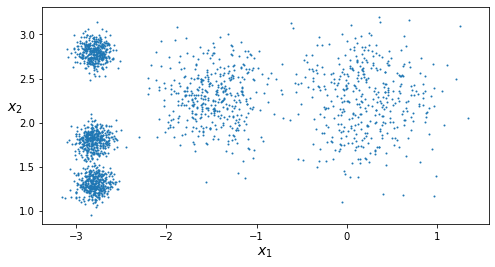

In [8]:
# Consider the unlabeled dataset shown below: you can clearly see five blobs of instances. The K-Means algorithm is a 
#simple algorithm capable of clustering this kind of dataset very quickly and efficiently, often in just a few iterations.

from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

In [11]:
# Train a K-Means clusterer on this dataset - it tries to find each blob's center and assign each instance to the closest
# blob. Note that the number of clusters k must be specified - in general datasets this is not so obvious (see below)

from sklearn.cluster import KMeans
k = 5
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

In [12]:
# Each instance was assigned to one of the five clusters. In the context of clustering, an instance's label is the index
# of the cluster it is assigned to (not to be confused with class labels, since it is unsupervised). The KMeans clusterer
# preserves a copy of the labels of the instances it was trained on, available in the labels_ attribute.
y_pred, y_pred is kmeans.labels_

(array([4, 0, 1, ..., 3, 1, 0], dtype=int32), True)

In [13]:
# We can also get the five centroids the algorithm found:
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-1.46679593,  2.28585348],
       [-2.79290307,  2.79641063],
       [-2.80037642,  1.30082566]])

In [14]:
# You can also assign new instnaces to the cluster whose centroid is closest
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, -2.5]])
kmeans.predict(X_new)

array([1, 1, 3, 4], dtype=int32)

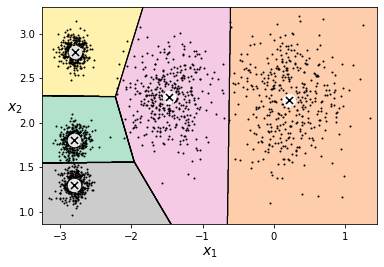

In [15]:
# Looking at the decision boundaries, the vast majority of the instances were clearly assigned to the appropriate cluster,
# but a few instances were probably mislabeled (especially near the boundary between the top-left cluster and the central 
# cluster). Indeed, the K-Means algorithm does not behave very well when the blobs have very different diameters because 
# all it cares about when assigning an instance to a cluster is the distance to the centroid.

import numpy as np

def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
        
plot_decision_boundaries(kmeans, X)

In [16]:
# Instead of assigining each instance to a single cluster (hard clustering), it can be useful to give each instance a score
# per cluster (soft clustering). The score can be the distance between the instance and the centroid, or it can be a 
# similarity score (affinity), such as the Gaussian RBF. In the KMeans class, the transform() method measures the distance
# from each instance to every centroid:
kmeans.transform(X_new)

array([[2.81093633, 0.32995317, 1.49439034, 2.9042344 , 2.88633901],
       [5.80730058, 2.80290755, 4.4759332 , 5.84739223, 5.84236351],
       [1.21475352, 3.29399768, 1.69136631, 0.29040966, 1.71086031],
       [4.30564816, 5.73681686, 5.02544607, 5.30045797, 3.80606428]])

In [17]:
# Now each instance has k-scores representing the distance to each centroid. If you have a high-dimensional dataset, 
# transforming it in this way gives you a k-dimensional dataset - very efficient non-linear dimensionality reduction.

In [18]:
# So, how does the algorithm work? Well, suppose you were given the centroids. You could easily label all the instances in
# the dataset by assigning each of them to the cluster whose centroid is closest. Conversely, if you were given all the
# instance labels, you could easily locate all the centroids by computing the mean of the instances for each cluster. But
# you are given neither the labels nor the centroids, so how can you proceed? Well, just start by placing the centroids
# randomly (e.g., by picking k instances at random and using their locations as centroids). Then label the instances,
# update the centroids, label the instances, update the centroids, and so on until the centroids stop moving. The
# algorithm is guaranteed to converge in a finite number of steps (usually quite small); it will not oscillate forever
# because the mean squared distance between the instances and their closest centroid can only go down at each step.

# The computational complexity is generally linear w.r.t. the number of instances m, number of clusters k, and the dataset
# dimensionality/number of features n. However, this is only true when the data has a clustering structure - if it does not
# then in the worst case the complexity can increase exponentially with m (exp(m)). In reality this rarely happens, and 
# K-Means is generally one of the fastest clustering algorithms.

In [26]:
# Centroid initialization methods:
# The random centroid initialization step can mean that, although K-Means converges, it converges to a local optimum. 
# To mitigate the risk of this, there are a few techniques:

# (1) If you know appoximately where the centroids should be, set the init hyperparameter to a np.array containing the list
# of centroids and set n_init to 1.
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1)
kmeans.fit(X)

# (2) Another solution is to run the algorithm multiple times with different random initializations and keep the best 
# solution. The n_init hyperparameter controls the number of random initializations/runs of the algorithm; the default is
# set to 10, so the algorithm runs 10 times when fit() is called, and sklearn keeps the best solution. 
# It determines the best solution by using a performance metric - the model's inertia. The inertia is the mean squared
# distance between each instance and its closest centroid, so KMeans is run n_init times and the model with the lowest 
# inertia is provided as the best solution.  
# The score() method returns the negative intertia, because a predictors score() method always respects Scikit-Learn's
# 'greater is better' rule: if one predictor is better than another, its score() method should return a greater score. 
kmeans.inertia_, kmeans.score(X)

# K-Means++ is an improvement to the algorithm which introduces a smarter initialization step that tends to select 
# centroids that are distant from one another, making the algorithm much less likely to converge to a suboptimal solution.
# The additional computation for the initialization is worth it as it makes it possible to drastically reduce to number
# of times the algorithm needs to be run to find the optimal solution. The KMeans class uses this initialization method by 
# default.
# Step 1. Take one centroid c^(1), chosen uniformly at random from the dataset
# Step 2. Take a new centroid c^(i), choosing an instance x^(i) with probability D(x^(i))^2 / ΣD(x^(j))^2, summing from 
# j=1 to i, where D(x^(i)) is the distance between x^(i) and the closest centroid that was already chosen. This 
# probability distribution ensures that instances farther away from the already chosen centroids are much more likely to
# be selected as centroids.
# Step 3. Repeat step 2 until all k-centroids have been selected.

(211.62337889822362, -211.6233788982236)

In [28]:
# Accelerated K-Means accelerates the algorithm by avoiding many unecessary distance calculations, done by exploiting the
# triangle inequality (that a straight line is always the shortest distance between two points, AC <= AB + BC) and by
# keeping track of lower and upper bounds for distances between instances and centroids. Again, the KMeans class uses this 
# by default.

# Mini-batch K-Means is another important variant which, instead of using the full dataset at each iteration, is capable
# of using mini-batches, moving the centroids just slightly at each iteration. This speeds up the algorithm by around a 
# factor of 3 or 4 and makes it possible to cluster huge datasets that do not fit in memory. The difference in speeds
# of the two algorithms increases with k, but likewise the differnce in inertia, which is generally slightly worse for
# the mini-batch algorithm, increase with k. The sklearn MiniBatchKmeans class can be used just like KMeans:

from sklearn.cluster import MiniBatchKMeans
minibatch_kmeans = MiniBatchKMeans(n_clusters=5)
minibatch_kmeans.fit(X)

# If the dataset does not fit in memory, the simplest option is to use the memmap class, as we did for incremental PCA. 
# Alternatively, you can pass one mini-batch at a time to the partial_fit() method, but this will require much more work,
# as you will need to perform multiple initializations and select the best one yourself (see master notebook for example).

MiniBatchKMeans(n_clusters=5)

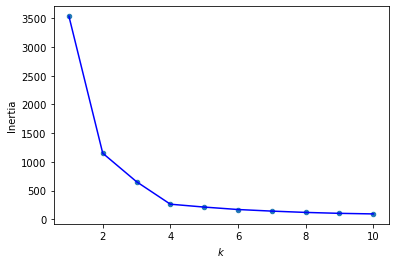

In [47]:
# In general, we will not know the correct number of clusters k, and the results can be quite bad if k is wrong.
# Unfortunately it is not as simple as picking the model with the lowest inertia, e.g. the inertia of a K-Means clustering
# on the above dataset with k = 8 is lower than with k = 5. Indeed as k increases, the inertia generally decreases as the
# closer each instance is to its closest centroid.

inertia = []
k_values = list(range(1, 11))
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(k_values, inertia, 'b-')
plt.scatter(k_values, inertia, s=20)
plt.xlabel(r'$k$')
plt.ylabel('Inertia')
plt.show()

# As you can see, the inertia drops very quickly as we increase k up to 4, but then it decreases much more slowly as we
# keep increasing k. This curve has roughly the shape of an arm, and there is an “elbow” at k = 4. So, if we did not know
# better, 4 would be a good choice: any lower value would be dramatic, while any higher value would not help much, and we
# might just be splitting perfectly good clusters in half for no good reason.

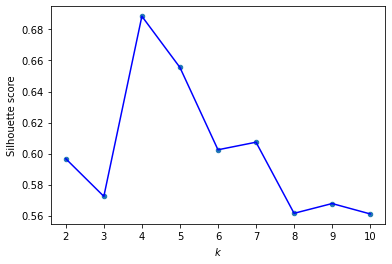

In [54]:
# This technique for choosing the best value for the number of clusters is rather coarse. A more precise approach (but
# also more computationally expensive) is to use the silhouette score, which is the mean silhouette coefficient over all
# the instances. An instance’s silhouette coefficient is equal to (b – a) / max(a, b), where a is the mean distance to the
# other instances in the same cluster (i.e., the mean intra-cluster distance) and b is the mean nearest-cluster distance
# (i.e., the mean distance to the instances of the next closest cluster, defined as the one that minimizes b, excluding the
# instance’s own cluster). The silhouette coefficient can vary between –1 and +1. A coefficient close to +1 means that the
# instance is well inside its own cluster and far from other clusters, while a coefficient close to 0 means that it is
# close to a cluster boundary, and finally a coefficient close to –1 means that the instance may have been assigned to the
# wrong cluster.

from sklearn.metrics import silhouette_score

silhouette_scores = []
k_values = list(range(2, 11))
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

plt.plot(k_values, silhouette_scores, 'b-')
plt.scatter(k_values, silhouette_scores, s=20)
plt.xlabel(r'$k$')
plt.ylabel('Silhouette score')
plt.show()

# As you can see, this visualization is much richer than the previous one: although it confirms that k = 4 is a very good
# choice, it also underlines the fact that k = 5 is quite good as well, and much better than k = 6 or 7. This was not 
# visible when comparing inertia values.

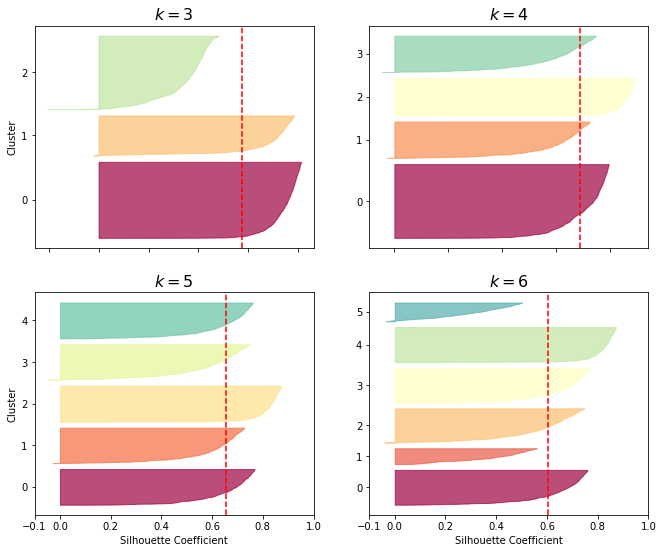

In [55]:
# An even more informative visualization is obtained when you plot every instance’s silhouette coefficient, sorted by the
# cluster they are assigned to and by the value of the coefficient. This is called a silhouette diagram.

from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl

plt.figure(figsize=(11, 9))

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)

    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")

    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

# Each diagram contains one knife shape per cluster. The shape’s height indicates the number of instances the cluster
# contains, and its width represents the sorted silhouette coefficients of the instances in the cluster (wider is better).
# The dashed line indicates the mean silhouette coefficient.

In [56]:
# The vertical dashed lines represent the silhouette score for each number of clusters. When most of the instances in a
# cluster have a lower coefficient than this score (i.e., if many of the instances stop short of the dashed line, ending to
# the left of it), then the cluster is rather bad since this means its instances are much too close to other clusters. We
# can see that when k = 3 and when k = 6, we get bad clusters. But when k = 4 or k = 5, the clusters look pretty good:
# most instances extend beyond the dashed line, to the right and closer to 1.0. When k = 4, the cluster at index 1 (the
# third from the top) is rather big. When k = 5, all clusters have similar sizes. So, even though the overall silhouette
# score from k = 4 is slightly greater than for k = 5, it seems like a good idea to use k = 5 to get clusters of similar
# sizes.

In [57]:
# In summary, while K-Means clustering is fast and scalable, it has several drawbacks: (1) K-Means has to be run several
# times to avoid suboptimal solutions. (2) Need to specify the number of clusters. (3) K-Means does not behave well
# with clusters of varying sizes, different densities, or non-spherical shapes. For example, elliptical clusters are best
# treat with Gaussian mixture models. 

# In general, it is important to scale the input features before you run K-Means, or the clusters may be very stretched 
# and K-Means will perform poorly. Scaling the features does not guarantee that all the clusters will be nice and 
# spherical, but it generally improves things.

In [59]:
# Applications of Clustering (can use K-Means or other clustering algorithms):
# Image Segmentation: the task of partitioning an image into multiple segments
# Semantic segmentation involves all the pixels part of the same object type getting assigned to the same segment.
# Instance segmentation involves all the pixels part of the same individual object getting assigned to the same segment.
# In self-driving vision, semantic involves all pixels that are part of a pedestrian's image being assigned to the
# pedestrian segment (i.e. one segment containing all pedestrians) while instance segmentation would have different
# segments for each pedestrian. The state of the art for these two segmentations are achieved by convolutional neural nets.

# Here, we will examine colour segmentation, where we assign pixels to the same segment if they have the same colour.
# This is useful in analuzing satellite images to measure how much total forest area there is in a region.

# Load image using Matplotlib's imread:
from matplotlib.image import imread   # or 'from imageio import imread'
import os

image = imread(os.path.join('images','unsupervised_learning','ladybug.png'))
image.shape # 3D array: height x width x color_channels (RGB). RBG between 0.0 and 1.0 (or 0 and 255 if using imageio)

(533, 800, 3)

In [68]:
# Reshape array to get a long list of RGB colours, then cluster with K-Means
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8).fit(X)
# Here, for each color (cluster), we assign all pixels in that cluster to be the mean (which is the centroids colour) 
segmented_img = kmeans.cluster_centers_[kmeans.labels_] 
print(segmented_img.shape)
segmented_img = segmented_img.reshape(image.shape)

(426400, 3)


In [67]:
X.shape, kmeans.cluster_centers_, kmeans.labels_

((426400, 3),
 array([[0.09952782, 0.2535836 , 0.01684142],
        [0.983089  , 0.93308306, 0.0255872 ],
        [0.87749034, 0.7184111 , 0.03649677],
        [0.02274826, 0.11053324, 0.00578075],
        [0.21835253, 0.38603145, 0.05759044],
        [0.6111557 , 0.63020575, 0.38848713],
        [0.7661097 , 0.19850236, 0.04363221],
        [0.37175143, 0.5225493 , 0.15672617]], dtype=float32),
 array([3, 3, 3, ..., 0, 3, 3], dtype=int32))

In [69]:
# Can experiment with various numbers of clusters.

segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

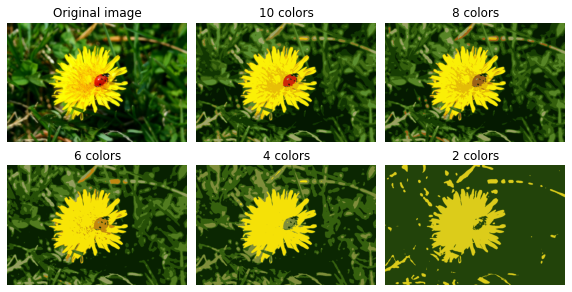

In [71]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')
plt.show()

#With fewer than 8 clusters, the ladydbugs red colour fails to get a cluster of its own - it merges with colours from
# its environment. This is because K-Means prefers clusters of similar sizes. The ladybug is small (much smaller than
# the rest of the image) so even though its colour is flashy, K-Means fails to dedicate a cluster to it. 

In [91]:
# Using Clustering for Preprocessing:
# Clustering can be an efficient approach to dimensionality reduction, in particular as a preprocessing step prior
# to a supervised learning algorithm.

# Applying this to the digits dataset (similar to MNIST, with 1797 grayscale 8 x 8 images representing digits from 0 to 9):
# Baseline (no preprocessing)
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_digits, y_digits = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=42)

log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train)
log_reg_acc = log_reg.score(X_test, y_test)
print(log_reg.score(X_test, y_test))

0.9688888888888889


In [159]:
# Applying K-Means clustering as a preprocessing step:

from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('kmeans', KMeans(n_clusters=50, random_state=42)),
    ('log_reg', LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42))
])
pipeline.fit(X_train, y_train)
preproc_acc = pipeline.score(X_test, y_test)
print(preproc_acc)
print(str(((1-preproc_acc)-(1-log_reg_acc))*100/(1-log_reg_acc))+'% change in error rate.')

0.98
-35.714285714285616% change in error rate.


In [85]:
# We chose 50 clusters instead of 10 because, even though there are only 10 digit classes, each digit can be written
# in several different way, so it is preferable to use a larger number of clusters.
# Since K-Means is just a preprocessing step in a classification pipeline, finding a more optimal value of k is much 
# simpler than earlier - no need to perform silhouette analysis or minimizing intertia, the best value of k is simply the
# one that results in the best classification performance during cross-validation. Using GridSearchCV:

from sklearn.model_selection import GridSearchCV

param_grid = dict(kmeans__n_clusters=range(10, 100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=1)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 90 candidates, totalling 270 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:  9.7min finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans',
                                        KMeans(n_clusters=50, random_state=42)),
                                       ('log_reg',
                                        LogisticRegression(max_iter=5000,
                                                           multi_class='ovr',
                                                           random_state=42))]),
             param_grid={'kmeans__n_clusters': range(10, 100)}, verbose=1)

In [160]:
grid_clf.best_params_, grid_clf.score(X_test, y_test)

({'kmeans__n_clusters': 57}, 0.98)

In [162]:
# Using Clustering for Semi-Supervised Learning (where we have many unlabeled instances and very few labeled instances):

n_labeled = 50
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])
log_reg.score(X_test, y_test)

0.8333333333333334

In [163]:
# The accuracy is just 83.3%. It should come as no surprise that this is much lower than earlier, when we trained the
# model on the full training set. Let’s see how we can do better - first, let’s cluster the training set into 50 clusters.
# Then for each cluster, let’s find the image closest to the centroid. We will call these images the representative images:

k = 50

kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]
X_digits_dist.shape, X_train.shape

((1347, 50), (1347, 64))

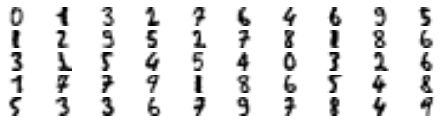

In [164]:
plt.figure(figsize=(8, 2))
for index, digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')
plt.show()

In [165]:
# Need to manually label the representative digits to use them for the Logistic Regressor
y_representative_digits = np.array([
    0, 1, 3, 2, 7, 6, 4, 6, 9, 5,
    1, 2, 9, 5, 2, 7, 8, 2, 8, 6,
    2, 1, 5, 4, 5, 4, 0, 3, 2, 6,
    1, 7, 7, 9, 1, 8, 6, 5, 4, 8,
    5, 3, 3, 6, 7, 9, 7, 8, 4, 9])

# Now we have a dataset with just 50 labeled instances, but instead of being random instances, each of them is a 
# representative image of its cluster.

log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

# Increase in accuracy from 83.3% to 87.3%. Since it is often costly and painful to label instances, especially when it 
# has to be done manually by experts, it is a good idea to label representative instances rather than just random 
# instances.

0.8733333333333333

In [166]:
# But perhaps we can go one step further: what if we propagated the labels to all the other instances in the same cluster?
# This is called label propagation:

y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i]

log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

# Good increase in accuracy of around 2.2%. It may be possible to increase the accuracy further by only propagating
# the labels to instances close to the centroid, instead of all of them (including those near the cluster boundaries).

0.8955555555555555

In [221]:
# Only propagate the labels for 20% of the instances that are closest to each centroid.

percentile_closest = 20

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_] # Only include the distances to closest centroid
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1
    
partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [222]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

#Not sure why this is different from the book

0.8555555555555555

In [223]:
np.mean(y_train_partially_propagated == y_train[partially_propagated])

0.9446366782006921

In [224]:
# Active Learning:
# To continue improving your model and your training set, the next step could be to do a few rounds of active learning,
# which is when a human expert interacts with the learning algorithm, providing labels for specific instances when the
# algorithm requests them. There are many different strategies for active learning, but one of the most common ones is
# called uncertainty sampling. Here is how it works:

# 1. The model is trained on the labeled instances gathered so far, and this model is
# used to make predictions on all the unlabeled instances.
# 2. The instances for which the model is most uncertain (i.e., when its estimated
# probability is lowest) are given to the expert to be labeled.
# 3. You iterate this process until the performance improvement stops being worth
# the labeling effort.

# Other strategies include labeling the instances that would result in the largest model change, or the largest drop in 
# the model’s validation error, or the instances that different models disagree on (e.g., an SVM or a Random Forest).

In [225]:
# DBSCAN is an algorithm with a very different approach to clustering than K-Means, based on local density estimation.
# The algorithm defines clusters as continuous regions of high density:
# (1) For each instance, the algorithm counts how many instances are located within a small distance epsilon - this region
# is the instance's epsilon neighbourhood.
# (2) If an instance has at least min_samples instances in its eps-neighbourhood (incl. itself), then it is considered
# a core instance. So core instances are those that are located in dense regions.
# (3) All instances in the neighbourhood of a core instance belong to the same cluster. This neighbourhood may include 
# other core instances; therefore, a long sequence of neighbouring core instances forms a single cluster.
# (4) Any instance that is not a core instance and does not have one in its neighbourhood is considered an anomaly.

#DBSCAN works well if all the clusters are dense enough and if they are well separated by low-density regions. Let's test
# it on the moons dataset:

from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [228]:
# DBSCAN labels all the instances, with -1 indicating that the instance is considered an anomaly.
dbscan.labels_[:50], dbscan.labels_.shape

(array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5,  2,  3,  0,  2,  2,  2,  4,
         2,  2,  4,  0,  5,  1,  0,  5,  5,  3,  2,  2,  2,  4,  5,  0,  6,
         1, -1,  0,  0,  2,  3, -1,  3,  4, -1,  4,  4,  2,  0,  6,  2]),
 (1000,))

In [229]:
# The indices of the core instances are available in the core_sample_indices_ instance variable, and the core instances
# themselves are avaiable in the components_ instance variable:
len(dbscan.core_sample_indices_), dbscan.components_

(808,
 array([[-0.02137124,  0.40618608],
        [-0.84192557,  0.53058695],
        [ 0.58930337, -0.32137599],
        ...,
        [ 1.66258462, -0.3079193 ],
        [-0.94355873,  0.3278936 ],
        [ 0.79419406,  0.60777171]]))

In [231]:
# Plotting the data with the clustering shows that the algorithm identified quite a lot of anomalies, and seven different
# clusters (not expected for the simple moons dataset). If we widen each instances neighbourhood by increasing eps to 0.2,
# we get a more reasonable clustering into the two moon shapes.

dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(X)
len(dbscan.core_sample_indices_), dbscan.labels_[:50]

# Now all of the 1000 instances are core instances (so no anomalies) and are grouped into one of two clusters.

(1000,
 array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
        1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
        1, 1, 0, 0, 1, 0]))

In [233]:
# Somewhat surprisingly, the DBSCAN class does not have a predict() method, although it has a fit_predict() method
# (fit_predict finds the clusters given the data, then returns the predicted cluster index for each instance).
# In other words, it cannot predict which cluster a new instance belongs to. This implementation decision was made
# because different classification algorithms can be better for different tasks, so the authors decided to let the user
# choose which one to use. Moreover, it’s not hard to implement. For example, let’s train a KNeighborsClassifier:

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

# Note that we only trained the classifier on the core instances, but we could also have chosen to train it on all the
# instances, or all instances but the anomalies: this choice depends on the final task.

KNeighborsClassifier(n_neighbors=50)

In [235]:
# Given new instances, we can predict which cluster they most likely belong to and even estimate a probability for each
# cluster:

X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new), knn.predict_proba(X_new)

(array([1, 0, 1, 0]),
 array([[0.18, 0.82],
        [1.  , 0.  ],
        [0.12, 0.88],
        [1.  , 0.  ]]))

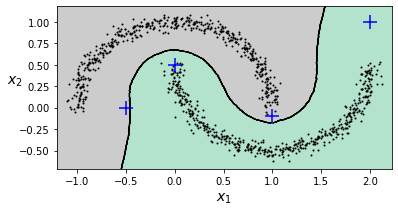

In [237]:
# The decision boundary is plotted below (the crosses represent the four instances in X_new). 

plt.figure(figsize=(6, 3))
plot_decision_boundaries(knn, X, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="+", s=200, zorder=10)
plt.show()

In [246]:
# Notice that since there is no anomaly in the training set, the classifier always chooses a cluster, even when that
# cluster is far away. It is fairly straightforward to introduce a maximum distance, in which case the two instances that
# are far away from both clusters are classified as anomalies. To do this, use the kneighbors() method of the
# KNeighborsClassifier. Given a set of instances, it returns the distances and the indices of the k nearest neighbors in
# the training set (two matrices, each with k columns):

y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
# y_pred are the labels of each instance X_new
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_dist, y_pred_idx, y_pred

(array([[0.43045422],
        [0.02225568],
        [0.06010476],
        [0.48399468]]),
 array([[909],
        [325],
        [915],
        [231]]),
 array([[1],
        [0],
        [1],
        [0]]))

In [247]:
# Label the instance an anomaly if distance to its nearest neighbour is > 0.2
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1,  0,  1, -1])

In [248]:
# In short, DBSCAN is a very simple yet powerful algorithm capable of identifying any number of clusters of any shape.
# It is robust to outliers, and it has just two hyperparameters  (eps and min_samples). If the density varies
# significantly across the clusters, however, it can be impossible for it to capture all the clusters properly. Its
# computational complexity is roughly O(m log m), making it pretty close to linear with regard to the number of instances,
# but Scikit-Learn’s implementation can require up to O(m^2) memory if eps is large.

# There is also the Hierarchical DBSCAN (HDBSCAN) implemented in the scikit-learn-contrib-project.

In [ ]:
# Other Clustering Algorithms:
# Scikit-Learn implements several more clustering algorithms that you should take a look at. We cannot cover them all in
# detail here, but here is a brief overview:

# Agglomerative clustering
# A hierarchy of clusters is built from the bottom up. Think of many tiny bubbles floating on water and gradually
# attaching to each other until there’s one big group of bubbles. Similarly, at each iteration, agglomerative clustering
# connects the nearest pair of clusters (starting with individual instances). If you drew a tree with a branch for every
# pair of clusters that merged, you would get a binary tree of clusters, where the leaves are the individual instances.
# This approach scales very well to large numbers of instances or clusters. It can capture clusters of various shapes, it
# produces a flexible and informative cluster tree instead of forcing you to choose a particular cluster scale, and it can
# be used with any pairwise distance. It can scale nicely to large numbers of instances if you provide a connectivity
# matrix, which is a sparse m × m matrix that indicates which pairs of instances are neighbors (e.g., returned by
# sklearn.neighbors.kneighbors_graph()). Without a connectivity matrix, the algorithm doesn't scale well to large datasets.

# BIRCH
# The BIRCH (Balanced Iterative Reducing and Clustering using Hierarchies) algorithm was designed specifically for very
# large datasets, and it can be faster than batch K-Means, with similar results, as long as the number of features is not
# too large (<20). During training, it builds a tree structure containing just enough information to quickly assign each
# new instance to a cluster, without having to store all the instances in the tree: this approach allows it to use limited
# memory, while handling huge datasets.

# Mean-Shift
# This algorithm starts by placing a circle centered on each instance; then for each circle it computes the mean of all the
# instances located within it, and it shifts the circle so that it is centered on the mean. Next, it iterates this
# mean-shifting step until all the circles stop moving (i.e., until each of them is centered on the mean of the instances
# it contains). Mean-Shift shifts the circles in the direction of higher density, until each of them has found a local
# density maximum. Finally, all the instances whose circles have settled in the same place (or close enough) are assigned
# to the same cluster. Mean-Shift has some of the same features as DBSCAN, like how it can find any number of clusters of
# any shape, it has very few hyperparameters (just one—the radius of the circles, called the bandwidth), and it relies on
# local density estimation. But unlike DBSCAN, Mean-Shift tends to chop clusters into pieces when they have internal
# density variations. Unfortunately, its computational complexity is O(m2), so it is not suited for large datasets.

# Affinity propagation
# This algorithm uses a voting system, where instances vote for similar instances to be their representatives, and once the
# algorithm converges, each representative and its voters form a cluster. Affinity propagation can detect any number of
# clusters of different sizes. Unfortunately, this algorithm has a computational complexity of O(m2), so it too is not
# suited for large datasets.

# Spectral clustering
# This algorithm takes a similarity matrix between the instances and creates a lowdimensional embedding from it (i.e., it
# reduces its dimensionality), then it uses another clustering algorithm in this low-dimensional space (Scikit-Learn’s
# implementation uses K-Means.) Spectral clustering can capture complex cluster structures, and it can also be used to cut
# graphs (e.g., to identify clusters of friends on a social network). It does not scale well to large numbers of instances,
# and it does not behave well when the clusters have very different sizes.